# German Credit Risk 

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import number

sns.set()
pd.set_option('display.max_columns', None)

## Business Understanding / Data Understanding

In [51]:
df = pd.read_csv('german_credit_data.csv', index_col=False)

In [52]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [53]:
df.shape

(1000, 11)

In [55]:
!pip install plotly

     --------------------------------------- 15.6/15.6 MB 65.6 MB/s eta 0:00:00
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# EDA

In [56]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
from collections import Counter

In [57]:
df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [59]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)


df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

In [60]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [62]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [63]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

In [67]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')



C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


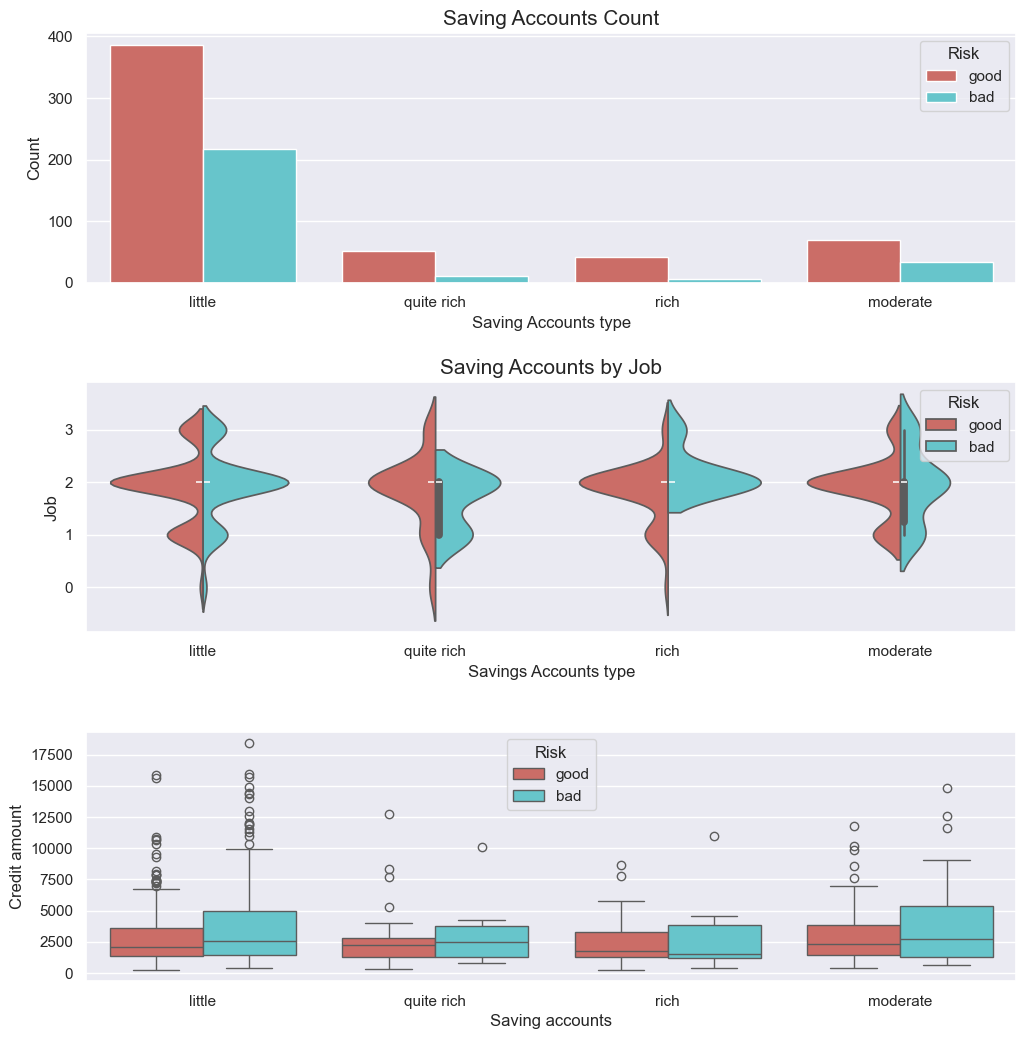

In [71]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df["Saving accounts"],df.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df, ax=ax[2],
            hue = "Risk",palette="hls")


plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

C:\Users\asaavedra\AppData\Local\Temp\ipykernel_4048\3816294019.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\asaavedra\AppData\Local\Temp\ipykernel_4048\3816294019.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




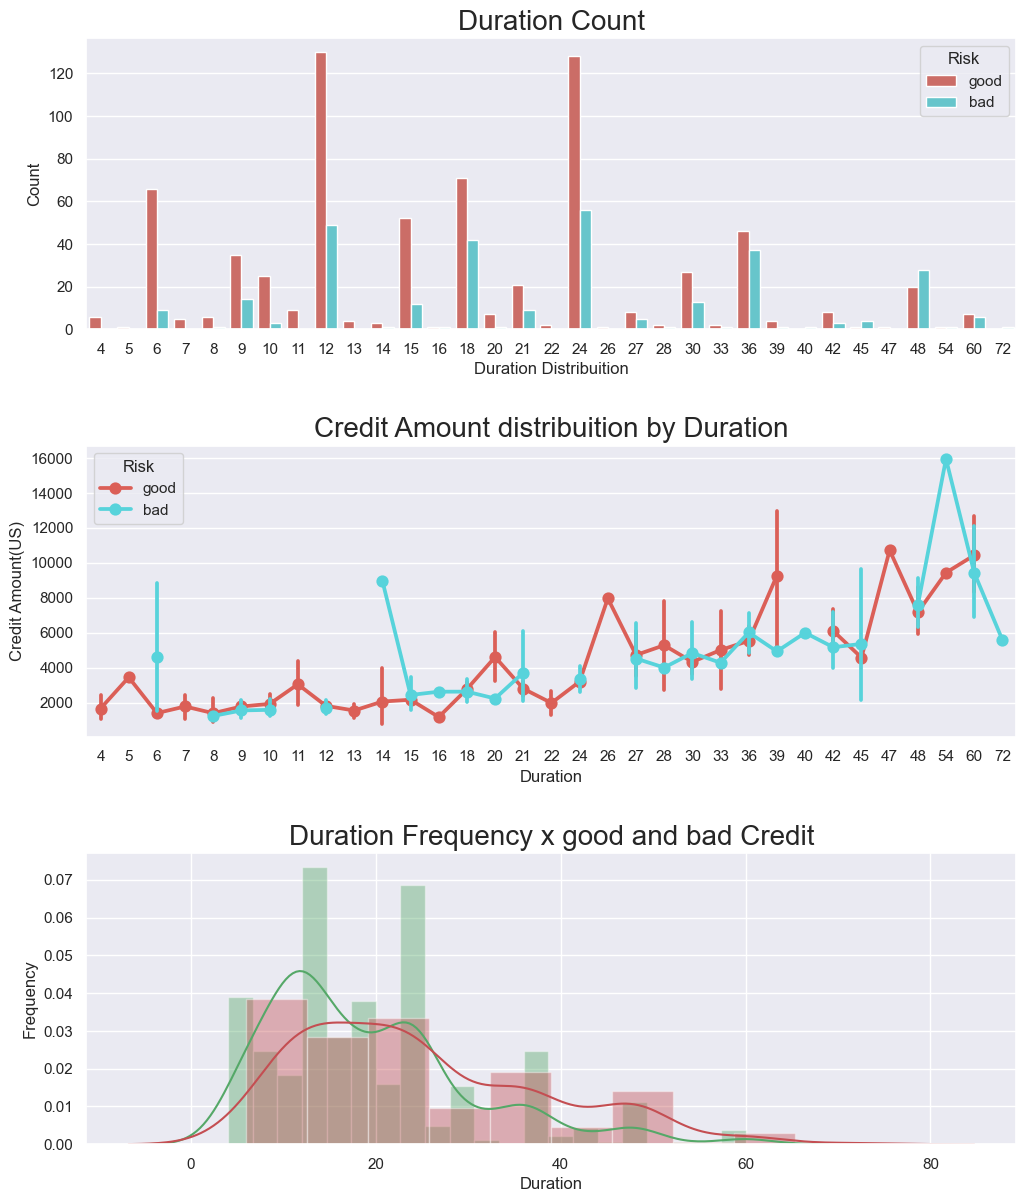

In [73]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

## Data Processing

### Data Pre-processing

In [21]:
df = df.drop(['Unnamed: 0'], axis=1) 

In [25]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

#### Numeric Variables
1. Age
2. Credit amount
3. Duration


#### Categorical Variables - OHE
1. Housing
2. Saving accounts
3. Checking account
4. Purpose

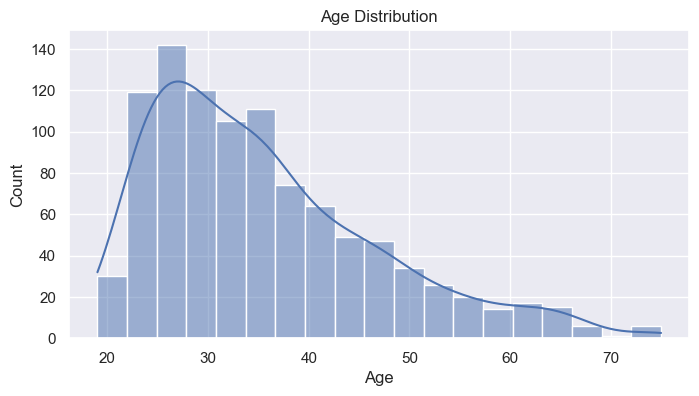

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

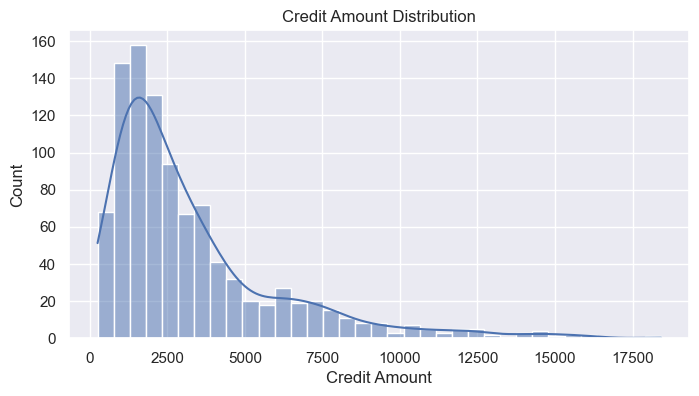

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Credit amount', kde=True)
plt.title('Credit Amount Distribution')
plt.xlabel('Credit Amount')
plt.show()

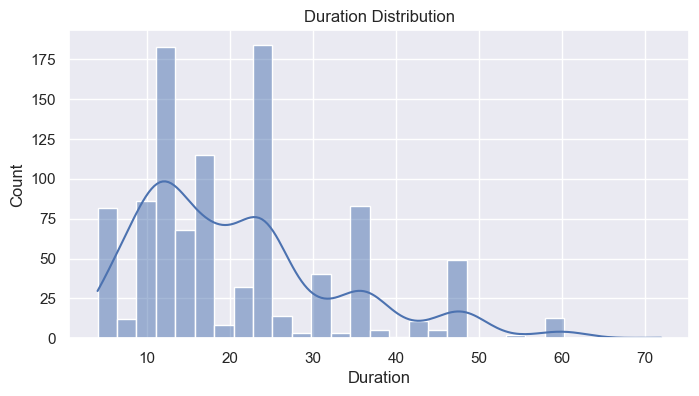

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Duration', kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   int64 
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [51]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})

In [52]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,NaN,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,NaN,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,1,3,own,little,little,3857,30,car,1
997,38,1,2,own,little,NaN,804,12,radio/TV,1
998,23,1,2,free,little,little,1845,45,radio/TV,0


### Data Processing

### The Weight of Evidence (WOE) Imputation - Used in credit scoring and risk modeling
 It helps in encoding the relationship between a category and the likelihood of an event 
 The resulting WOE values provide a way to measure how well a category separates events from non-events. 
 A higher positive WOE indicates a stronger association with events, while a lower negative WOE indicates a stronger association with non-events.

### Imputation of categorical variables

In [56]:
def calculate_woe_iv(data, target_col, categorical_col):
    # Create a cross-tabulation table
    crosstab = pd.crosstab(data[categorical_col], data[target_col])
    
    # Calculate the number of good and bad outcomes in each category
    good = crosstab[0]
    bad = crosstab[1]
    
    # Calculate the proportion of good and bad outcomes
    total_good = good.sum()
    total_bad = bad.sum()
    
    # Avoid division by zero
    total_good = max(total_good, 1)
    total_bad = max(total_bad, 1)
    
    # Calculate WOE and IV for each category
    woe = np.log((good / total_good) / (bad / total_bad))
    iv = (good / total_good - bad / total_bad) * woe
    
    return woe, iv

# Calculate WOE for 'Saving accounts' and 'Checking account' features
saving_woe, saving_iv = calculate_woe_iv(df, 'Risk', 'Saving accounts')
checking_woe, checking_iv = calculate_woe_iv(df, 'Risk', 'Checking account')

# Create a dictionary to store the WOE values
woe_values_saving = dict(zip(df['Saving accounts'].unique(), saving_woe))
woe_values_checking = dict(zip(df['Checking account'].unique(), checking_woe))

# Print the WOE values for 'Saving accounts'
print("WOE values for 'Saving accounts':")
print(woe_values_saving)

# Print the WOE values for 'Checking account'
print("\nWOE values for 'Checking account':")
print(woe_values_checking)

WOE values for 'Saving accounts':
{nan: 0.1411714450743027, 'little': 0.009365481017575887, 'quite rich': -0.8362369847843828, 'rich': -1.2287986880566395}

WOE values for 'Checking account':
{'little': 0.2970977538872982, 'moderate': -0.11960916908711455, nan: -0.9264660599158074}


In [57]:
woe_values_saving = {'little': 0.009365481017575887, 'quite rich': -0.8362369847843828, 'rich': -1.2287986880566395}

woe_values_checking = {'little': 0.2970977538872982, 'moderate': -0.11960916908711455}

In [58]:
def impute_with_woe(row, woe_dict):
    if pd.isna(row):
        return max(woe_dict, key=woe_dict.get)  # Impute with the category that has the highest WOE
    else:
        return row

# Impute missing values in 'Saving accounts' and 'Checking account'
df['Saving accounts'] = df['Saving accounts'].apply(lambda x: impute_with_woe(x, woe_values_saving))
df['Checking account'] = df['Checking account'].apply(lambda x: impute_with_woe(x, woe_values_checking))

In [59]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [60]:
df.shape

(1000, 10)

In [62]:
df['Checking account'].value_counts()

Checking account
little      668
moderate    269
rich         63
Name: count, dtype: int64

In [63]:
df['Saving accounts'].value_counts()

Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [64]:
df_nm = df.copy()

In [69]:
df_nm['Risk'].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [71]:
df_nm

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,little,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,little,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,little,1736,12,furniture/equipment,1
996,40,1,3,own,little,little,3857,30,car,1
997,38,1,2,own,little,little,804,12,radio/TV,1
998,23,1,2,free,little,little,1845,45,radio/TV,0


In [72]:
df_nm

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,little,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,little,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,little,1736,12,furniture/equipment,1
996,40,1,3,own,little,little,3857,30,car,1
997,38,1,2,own,little,little,804,12,radio/TV,1
998,23,1,2,free,little,little,1845,45,radio/TV,0


In [81]:
df_nm.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [98]:
from sklearn.preprocessing import OneHotEncoder

categorical_features_ohe = [
    'Housing', 'Saving accounts', 'Checking account', 'Purpose'
]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df_nm[['Purpose']])
columns_names = encoder.get_feature_names_out(['Purpose'])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Purpose']))
df_nm = pd.concat([df_nm, encoded_df], axis=1)


C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [100]:
df_nm = df_nm.drop(categorical_features_ohe, axis=1)

In [101]:
df_nm.shape

(1000, 24)

In [102]:
df_nm

,Age,Sex,Job,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1169,6,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,0,2,5951,48,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,1,2096,12,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,1,2,7882,42,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,1,2,4870,24,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1736,12,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,40,1,3,3857,30,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,38,1,2,804,12,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,23,1,2,1845,45,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
df_nm.to_csv('credit_risk_processed.csv')

## Data Imbalanced

In [6]:
df = pd.read_csv('credit_risk_processed.csv', index_col=False)

In [7]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Sex                          1000 non-null   int64  
 2   Job                          1000 non-null   int64  
 3   Credit amount                1000 non-null   int64  
 4   Duration                     1000 non-null   int64  
 5   Risk                         1000 non-null   int64  
 6   Housing_free                 1000 non-null   float64
 7   Housing_own                  1000 non-null   float64
 8   Housing_rent                 1000 non-null   float64
 9   Saving accounts_little       1000 non-null   float64
 10  Saving accounts_moderate     1000 non-null   float64
 11  Saving accounts_quite rich   1000 non-null   float64
 12  Saving accounts_rich         1000 non-null   float64
 13  Checking account_li

## Skewed Columns
1. Natural Logarithm to make data symmetric and stabilize variance

In [9]:
from scipy.stats import skew
skewness_df = pd.DataFrame({'features': df.select_dtypes(np.number).columns})
skewness_df['skew'] = skewness_df['features'].apply(lambda col: df[col].skew())
skewness_df['abs_skew'] = abs(skewness_df['skew'])
skewness_df['skewness'] = skewness_df['abs_skew'].apply(lambda col: True if col >= 0.5 else False)
skewness_df     

,features,skew,abs_skew,skewness
0,Age,1.020739,1.020739,True
1,Sex,-0.822868,0.822868,True
2,Job,-0.374295,0.374295,False
3,Credit amount,1.949628,1.949628,True
4,Duration,1.094184,1.094184,True
5,Risk,-0.874183,0.874183,True
6,Housing_free,2.529729,2.529729,True
7,Housing_own,-0.943140,0.943140,True
8,Housing_rent,1.677217,1.677217,True
9,Saving accounts_little,-1.396787,1.396787,True


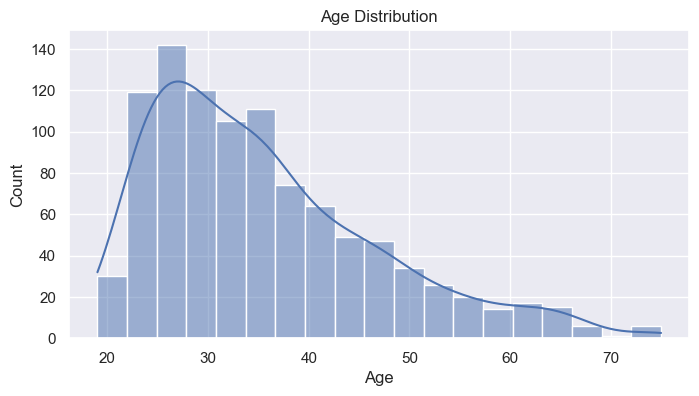

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [11]:
df['Age'] = np.log(df['Age'])

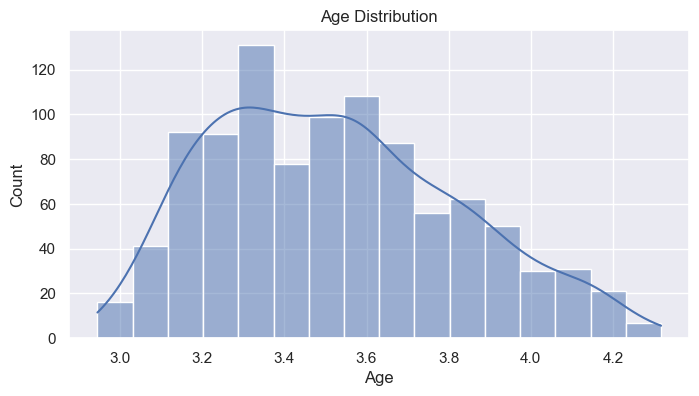

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

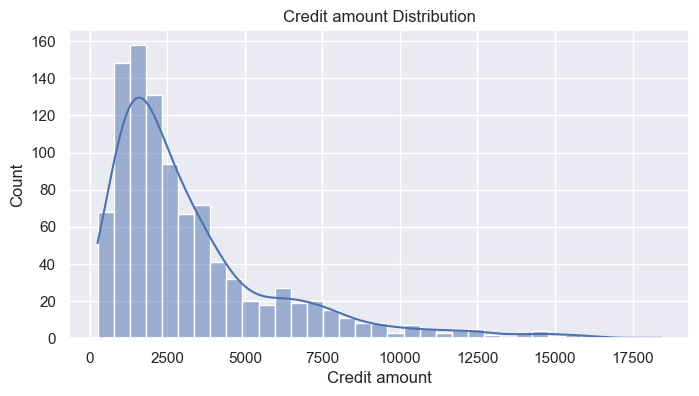

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Credit amount', kde=True)
plt.title('Credit amount Distribution')
plt.xlabel('Credit amount')
plt.show()

In [14]:
df['Credit amount'] = np.log(df['Credit amount'])

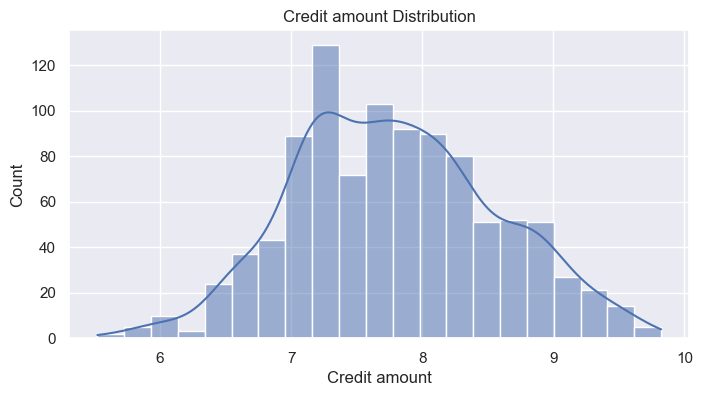

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Credit amount', kde=True)
plt.title('Credit amount Distribution')
plt.xlabel('Credit amount')
plt.show()

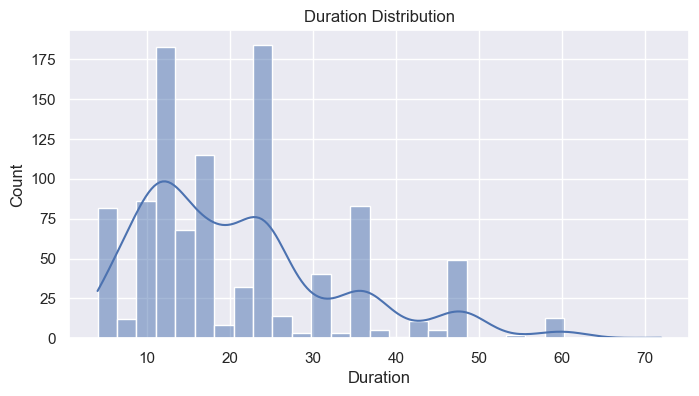

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Duration', kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.show()

In [17]:
df['Duration'] = np.log(df['Duration'])

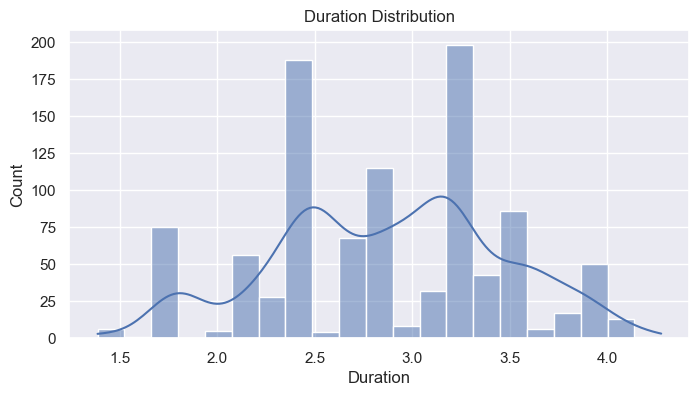

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Duration', kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.show()

## Imbalanced Classes - Oversampling SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X = df.drop(['Risk'], axis=1)
y = df['Risk']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
X_resampled.shape, y_resampled.shape

((1400, 23), (1400,))

In [22]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Risk'] = y_resampled

In [23]:
df_resampled['Risk'].value_counts()

Risk
1    700
0    700
Name: count, dtype: int64

In [24]:
df_resampled

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.204693,1,2,7.063904,1.791759,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,1
1,3.091042,0,2,8.691315,3.871201,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0
2,3.891820,1,1,7.647786,2.484907,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,1
3,3.806662,1,2,8.972337,3.737670,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1
4,3.970292,1,2,8.490849,3.178054,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3.869631,0,2,7.897766,3.562583,0.948365,0.0,0.051635,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0
1396,3.781515,0,3,9.440351,3.172806,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0
1397,3.476706,0,2,7.477838,3.178054,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0
1398,3.295626,0,2,7.561075,2.889259,0.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002744,0.0,0.0,0.997256,0.0,0.0,0.0,0


## Feature Selection Techniques

In [25]:
df_pca = df_resampled.copy()

In [26]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'Credit amount', 'Duration']

scaler = StandardScaler()

df_pca[numerical_columns] = scaler.fit_transform(df_pca[numerical_columns])

In [27]:
X_prepca = df_pca.drop(['Risk'], axis=1)
y_pca = df_pca['Risk']

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_prepca)

In [29]:
pca.explained_variance_ratio_

array([0.3037886 , 0.1892496 , 0.07580478, 0.07115144, 0.06202676,
       0.05474018, 0.04916356, 0.03796487, 0.03480594, 0.0330299 ,
       0.02078672, 0.01815826])

In [30]:
pca.n_components_

12

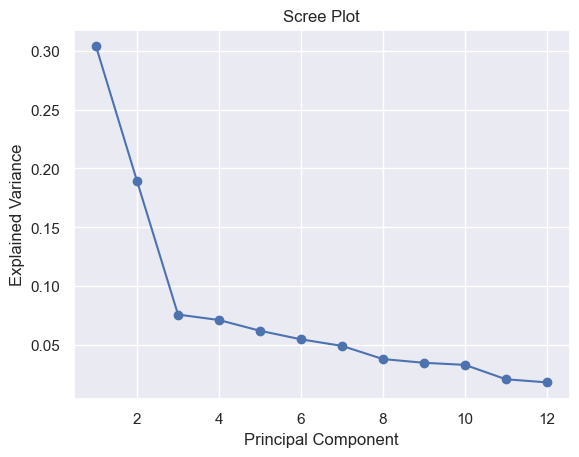

In [31]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

## Correlation Matrix


In [32]:
correlation_matrix = df_resampled.corr()
correlation_matrix

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
Age,1.000000,0.250366,0.066670,0.060638,-0.034175,0.291685,0.032237,-0.267565,0.001686,-0.067760,0.031845,0.060593,0.058654,-0.083919,0.045142,0.043151,0.099722,-0.020771,0.057871,-0.140688,-0.066738,0.046335,0.063257,0.157180
Sex,0.250366,1.000000,0.077278,0.112012,0.060354,0.126564,0.125644,-0.245677,-0.018897,0.005921,0.027205,-0.002043,0.047430,-0.049892,0.000296,0.101272,0.034688,-0.041912,-0.054067,-0.119469,0.019021,0.047101,0.012249,0.143236
Job,0.066670,0.077278,1.000000,0.319269,0.209468,0.134745,-0.065779,-0.029982,0.012491,0.009593,-0.032029,-0.002728,0.000412,0.034082,-0.069547,0.003005,0.028129,-0.016954,-0.015156,0.000786,-0.027449,-0.076745,0.123921,0.011326
Credit amount,0.060638,0.112012,0.319269,1.000000,0.640594,0.177075,-0.117805,-0.003005,0.059731,0.003914,-0.054175,-0.062654,-0.039061,0.090028,-0.098859,0.154130,0.064819,-0.087535,-0.090690,0.044218,-0.160178,-0.049111,0.116311,-0.104516
Duration,-0.034175,0.060354,0.209468,0.640594,1.000000,0.147396,-0.069155,-0.036046,0.035443,0.028342,-0.050923,-0.054354,-0.035741,0.081789,-0.089275,0.184005,-0.016943,-0.052679,-0.071443,-0.038551,-0.033396,-0.035984,0.087452,-0.249105
Housing_free,0.291685,0.126564,0.134745,0.177075,0.147396,1.000000,-0.529319,-0.174762,0.019850,-0.015037,-0.013200,-0.002175,0.001435,-0.008326,0.013746,-0.071198,0.138746,-0.035815,0.119472,-0.097027,-0.099952,0.046327,0.069036,-0.060255
Housing_own,0.032237,0.125644,-0.065779,-0.117805,-0.069155,-0.529319,1.000000,-0.742861,-0.001615,-0.013640,0.013366,0.008228,-0.031756,0.014961,0.036966,0.027451,-0.091340,0.010910,-0.058984,-0.045632,0.147701,0.000682,0.000805,0.129438
Housing_rent,-0.267565,-0.245677,-0.029982,-0.003005,-0.036046,-0.174762,-0.742861,1.000000,-0.013788,0.027695,-0.005096,-0.007833,0.035721,-0.010792,-0.053745,0.024321,-0.003475,0.015599,-0.025817,0.129516,-0.092542,-0.037346,-0.055407,-0.102672
Saving accounts_little,0.001686,-0.018897,0.012491,0.059731,0.035443,0.019850,-0.001615,-0.013788,1.000000,-0.671740,-0.491100,-0.431503,0.081447,-0.090663,0.010562,-0.038642,0.017624,-0.010440,0.011751,0.044369,-0.020920,-0.050081,0.001969,-0.129328
Saving accounts_moderate,-0.067760,0.005921,0.009593,0.003914,0.028342,-0.015037,-0.013640,0.027695,-0.671740,1.000000,-0.073430,-0.064201,-0.137365,0.153004,-0.018005,0.045869,0.003285,-0.006515,-0.013178,-0.068573,0.024244,0.007212,0.032817,0.020710


## Mutual Information

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

k = 20
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = mi_selector.fit_transform(X_resampled, y_resampled)

selected_feature_indices = mi_selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]
print(selected_feature_names)

Index(['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_radio/TV'],
      dtype='object')


In [34]:
mi_scores = mi_selector.scores_

feature_mi_pairs = list(zip(selected_feature_names, mi_scores))

sorted_feature_mi_pairs = sorted(feature_mi_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_names, sorted_mi_scores = zip(*sorted_feature_mi_pairs)

for feature, mi_score in sorted_feature_mi_pairs:
    print(f"Feature: {feature}, MI Score: {mi_score:.4f}")

Feature: Age, MI Score: 0.1827
Feature: Duration, MI Score: 0.1639
Feature: Saving accounts_little, MI Score: 0.0455
Feature: Checking account_little, MI Score: 0.0267
Feature: Housing_rent, MI Score: 0.0248
Feature: Housing_own, MI Score: 0.0210
Feature: Purpose_car, MI Score: 0.0208
Feature: Housing_free, MI Score: 0.0201
Feature: Job, MI Score: 0.0170
Feature: Sex, MI Score: 0.0166
Feature: Purpose_education, MI Score: 0.0165
Feature: Checking account_moderate, MI Score: 0.0131
Feature: Saving accounts_rich, MI Score: 0.0117
Feature: Checking account_rich, MI Score: 0.0115
Feature: Purpose_business, MI Score: 0.0092
Feature: Purpose_domestic appliances, MI Score: 0.0090
Feature: Saving accounts_moderate, MI Score: 0.0079
Feature: Credit amount, MI Score: 0.0049
Feature: Saving accounts_quite rich, MI Score: 0.0044
Feature: Purpose_radio/TV, MI Score: 0.0040



## Model Selection

1. Logistic Regression: It's a good starting point for binary classification problems and can serve as a baseline model.
1. Decision Trees and Random Forest: These can handle a mix of feature types and can provide insights into feature importance.
1. Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost): Gradient boosting algorithms are powerful and often perform well on classification tasks.
1. Support Vector Machines (SVM): SVMs can be effective for binary classification and can handle both numerical and categorical data.



In [35]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=.4 ,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

In [36]:
X_train.shape, X_val.shape, X_test.shape

((840, 23), (280, 23), (280, 23))

## Logistic Regression

In [118]:
X_pca.shape, y_pca.shape

((1400, 12), (1400,))

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

model_lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [112]:
y_pred = model_lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"The accuracy of Logistic Regression is: {accuracy}")

The accuracy of Logistic Regression is: 0.6857142857142857


In [113]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       133
           1       0.73      0.64      0.68       147

    accuracy                           0.69       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.69      0.69      0.69       280


In [114]:
# Parameter grid to search for the best hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],          # Regularization penalty type
}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\linear

In [115]:
# Train a new logistic regression model with the best parameters
best_logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000, **best_params)
best_logistic_reg.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_logistic_reg.predict(X_val)

print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       133
           1       0.72      0.64      0.68       147

    accuracy                           0.68       280
   macro avg       0.68      0.68      0.68       280
weighted avg       0.69      0.68      0.68       280


## Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
# Train a Gaussian Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_val)


In [144]:
# Calculate the accuracy on the validation set
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Validation Accuracy (Naive Bayes): {accuracy_nb:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_val, y_pred_nb))

Validation Accuracy (Naive Bayes): 0.57
              precision    recall  f1-score   support

           0       0.53      0.83      0.65       133
           1       0.69      0.34      0.46       147

    accuracy                           0.57       280
   macro avg       0.61      0.59      0.55       280
weighted avg       0.62      0.57      0.55       280


In [145]:
# Define a parameter grid for possible hyperparameters (Note: Naive Bayes models usually have few hyperparameters)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # A smoothing parameter for numerical stability
}

# Initialize GridSearchCV with Naive Bayes and parameter grid
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search_nb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_

# Train a new Gaussian Naive Bayes model with the best parameters
best_naive_bayes = GaussianNB(**best_params_nb)
best_naive_bayes.fit(X_train, y_train)


GaussianNB(var_smoothing=1e-06)

In [146]:
# Predict on the validation set with the tuned model
y_pred_best_nb = best_naive_bayes.predict(X_val)

# Print the classification report for the tuned Naive Bayes model
print(classification_report(y_val, y_pred_best_nb))

              precision    recall  f1-score   support

           0       0.53      0.83      0.65       133
           1       0.69      0.34      0.46       147

    accuracy                           0.57       280
   macro avg       0.61      0.59      0.55       280
weighted avg       0.62      0.57      0.55       280


## Decision Trees

In [125]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [126]:
y_pred = decision_tree.predict(X_val)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       133
           1       0.71      0.62      0.66       147

    accuracy                           0.67       280
   macro avg       0.67      0.67      0.67       280
weighted avg       0.67      0.67      0.67       280


In [127]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize GridSearchCV with decision tree and parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [129]:
# Train a new decision tree model with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_decision_tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       133
           1       0.71      0.62      0.66       147

    accuracy                           0.67       280
   macro avg       0.67      0.67      0.67       280
weighted avg       0.67      0.67      0.67       280


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
y_pred = random_forest.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

print(classification_report(y_val, y_pred))

Validation Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       133
           1       0.78      0.68      0.73       147

    accuracy                           0.73       280
   macro avg       0.74      0.73      0.73       280
weighted avg       0.74      0.73      0.73       280


In [133]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize GridSearchCV with Random Forest and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\asaavedra\PycharmProjects\CreditRisk\venv\lib\site-packages\sklearn\base.py", line 638,

In [134]:
# Train a new Random Forest model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_random_forest.predict(X_val)

print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       133
           1       0.79      0.71      0.75       147

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.75      0.75      0.75       280


## Gradient Boosting

In [135]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()

xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
# Predict on the validation set
y_pred = xgboost_model.predict(X_val)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       133
           1       0.77      0.75      0.76       147

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.75      0.75      0.75       280


In [137]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds
    'max_depth': [3, 4, 5],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate
    'subsample': [0.7, 0.8, 0.9],          # Fraction of samples used for each boosting round
    'colsample_bytree': [0.7, 0.8, 0.9],   # Fraction of features used for each tree
    'reg_lambda': [0, 1, 10],              # L2 regularization term
    'reg_alpha': [0, 1, 10]                # L1 regularization term
}

# Initialize GridSearchCV with XGBoost and parameter grid
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [147]:
best_params

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [149]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [138]:
# Train a new XGBoost model with the best parameters
best_xgboost_model = xgb.XGBClassifier(**best_params)
best_xgboost_model.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_xgboost_model.predict(X_val)

print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       133
           1       0.78      0.76      0.77       147

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.76      0.76      0.76       280


In [150]:
best_xgboost_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 10,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## SVM

In [139]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [140]:
# Predict on the validation set
y_pred = svm_model.predict(X_val)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.63      0.80      0.70       133
           1       0.76      0.58      0.66       147

    accuracy                           0.68       280
   macro avg       0.69      0.69      0.68       280
weighted avg       0.70      0.68      0.68       280


In [141]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type (linear or radial basis function)
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' kernel
}

# Initialize GridSearchCV with SVM and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [142]:
# Train a new SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_svm_model.predict(X_val)

print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       133
           1       0.79      0.70      0.74       147

    accuracy                           0.74       280
   macro avg       0.75      0.75      0.74       280
weighted avg       0.75      0.74      0.74       280


## Best Model

In [37]:
best_params = {
    'objective': 'binary:logistic',
 'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 1,
 'reg_lambda': 10,
 'subsample': 0.8
}

In [38]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier(**best_params)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = xgboost_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

print(classification_report(y_val, y_pred_best))

Validation Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       133
           1       0.78      0.76      0.77       147

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.76      0.76      0.76       280


In [63]:
df.head()

,Age,Sex,Job,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,1,2,7.063904,1.791759,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.091042,0,2,8.691315,3.871201,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.891820,1,1,7.647786,2.484907,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.806662,1,2,8.972337,3.737670,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.970292,1,2,8.490849,3.178054,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Testing

In [42]:
y_prediction = xgboost_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_prediction)
print(f"The accuracy on the test model is: {accuracy_test}")

The accuracy on the test model is: 0.7107142857142857


In [43]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       144
           1       0.69      0.74      0.71       136

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.71      0.71      0.71       280


Accuracy: 0.71
Precision: 0.69
Recall: 0.74
Specificity: 0.69
F1 Score: 0.71
AUC: 0.81


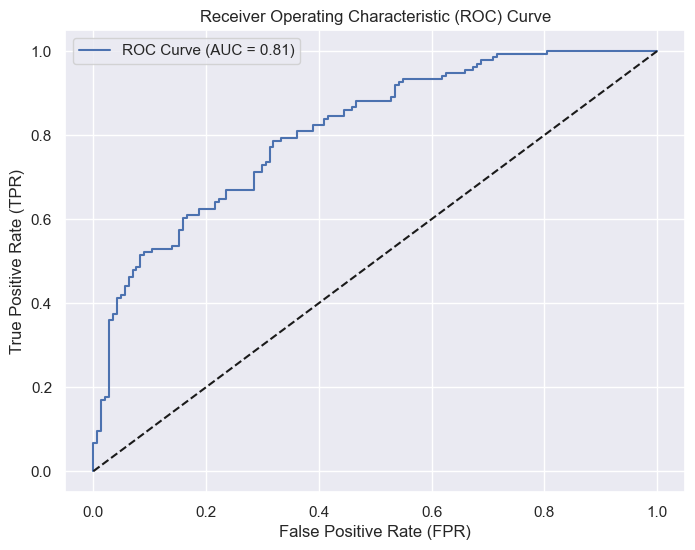

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_prediction)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_prediction)
print(f'Recall: {recall:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)

# Calculate specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.2f}')

# Calculate and print F1 score
f1 = f1_score(y_test, y_prediction)
print(f'F1 Score: {f1:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:, 1])

# Calculate and print AUC
auc = roc_auc_score(y_test, xgboost_model.predict_proba(X_test)[:, 1])
print(f'AUC: {auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Precision-Recall Curve

- The Precision-Recall Curve is important in scenarios where there is a class imbalance, meaning that one class significantly outnumbers the other.
-  A model could achieve high accuracy by simply predicting the majority class all the time.
- Achieving high precision and high recall is desirable, especially in applications where both false positives and false negatives are costly.

Average Precision: 0.80


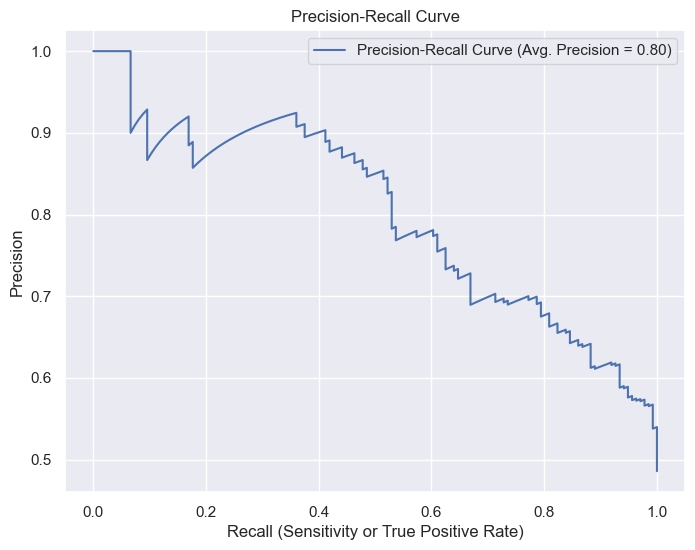

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, xgboost_model.predict_proba(X_test)[:, 1])

# Calculate and print average precision
average_precision = average_precision_score(y_test, xgboost_model.predict_proba(X_test)[:, 1])
print(f'Average Precision: {average_precision:.2f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (Avg. Precision = {average_precision:.2f})')
plt.xlabel('Recall (Sensitivity or True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# SHAP (SHapley Additive exPlanations)
SHapley Additive exPlanations (SHAP) is a unified framework for explaining the output of machine learning models. It provides a way to understand the contributions of individual features to model predictions


In [46]:
!pip install shap

  Using cached shap-0.43.0-cp39-cp39-win_amd64.whl (447 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
  Using cached numba-0.58.1-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached llvmlite-0.41.1-cp39-cp39-win_amd64.whl (28.1 MB)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[10:15:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


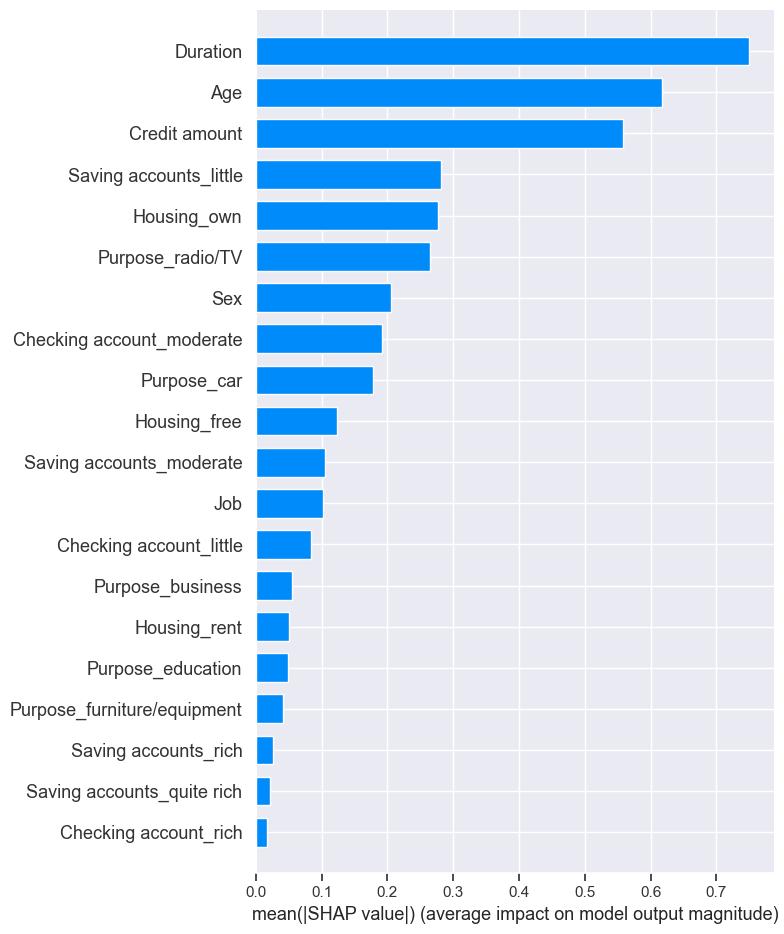

In [48]:
import shap

# Create an explainer for your model
explainer = shap.Explainer(xgboost_model, X_train)

# Calculate SHAP values for your validation data
shap_values = explainer.shap_values(X_val)

# Visualize SHAP summary plot for a specific prediction
shap.summary_plot(shap_values, X_val, plot_type="bar", show=False)

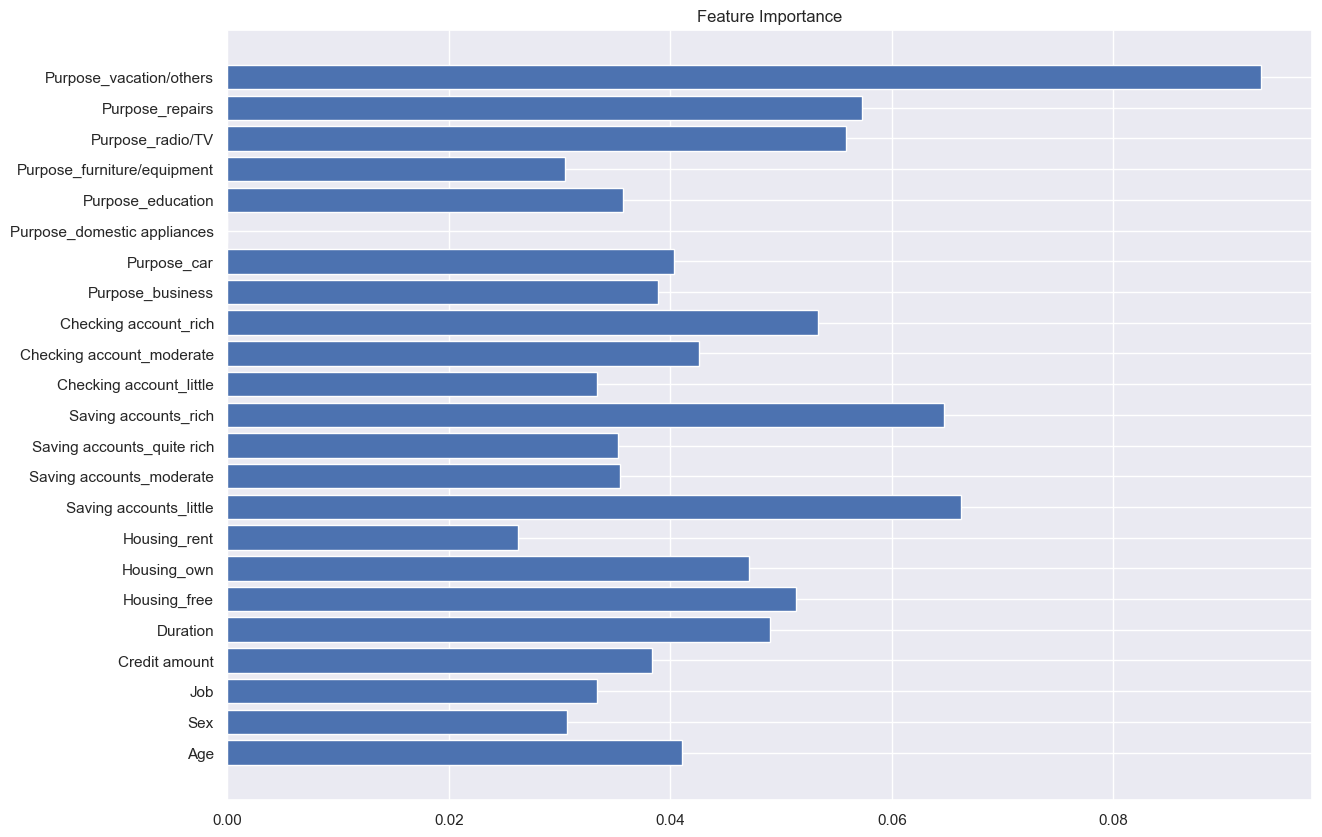

In [49]:
import matplotlib.pyplot as plt
feature_importance = xgboost_model.feature_importances_

plt.figure(figsize=(14, 10))
plt.barh(range(len(feature_importance)), feature_importance, tick_label=X_val.columns)
plt.title("Feature Importance")
plt.show()